In [1]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Lambda
from tensorflow.keras import backend as K
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.collections import LineCollection
from matplotlib.font_manager import FontProperties
from pathlib import Path

from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from spectral_metric.estimator import CumulativeGradientEstimator
from spectral_metric.visualize import make_graph

In [3]:
# Lectura de dataset

data_dir = ('CIFAR-10-only train')
data_dir = pathlib.Path(data_dir)

# Lectura de la carpeta train
data_dir_train = ('CIFAR-10-only train/train')
data_dir_train = pathlib.Path(data_dir_train)



image_count_train = len(list(data_dir_train.glob('*/*.png')))  # Cuenta la cantidad de imagenes de train


print(f"Cantidad de imagenes de train: {image_count_train}")


Cantidad de imagenes de train: 60000


In [4]:
# Dimensiones de imagen y tamaño de batch
img_height = 32
img_width = 32
#batch_size = len(list(data_dir.glob('*/*.png'))) # leer todas las imágenes al tiempo
batch_size = image_count_train

In [5]:
# PARA TRABAJAR CON LAS 20 CLASES, TOMAR LAS CARPETAS DE TEST Y LLEVARLAS A TRAIN (RENOMBRANDOLAS)

import tensorflow as tf
import pathlib

# Data splitting (entrenamiento y validación)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60000 files belonging to 20 classes.


In [6]:
class_names = train_ds.class_names
num_classes = len(class_names)  # get the number of the classes
print(f"Número de clases: {num_classes}")
print(f"Los nombres de las clases son: {class_names}")

Número de clases: 20
Los nombres de las clases son: ['airplane', 'airplane_t', 'automobile', 'automobile_t', 'bird', 'bird_t', 'cat', 'cat_t', 'deer', 'deer_t', 'dog', 'dog_t', 'frog', 'frog_t', 'horse', 'horse_t', 'ship', 'ship_t', 'truck', 'truck_t']


In [7]:
for images, labels0 in train_ds.take(1):  # only take first element of dataset
    x_train = images.numpy()
    y_train = labels0.numpy()

x_train /= 255.0  # Scale the features to the [0, 1] range
#x_train = x_train.reshape(len(x_train), 1, 256, 256)  # reshape into [N, C, H, W] for PyTorch
print(x_train.shape)

(60000, 32, 32, 3)


c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\Desktop\Proyecto-de-grado-CSG\1 - prueba de CSG\Pruebas en distintos datasets\spectral_metric\visualize.py:48: RuntimeWarning: divide by 

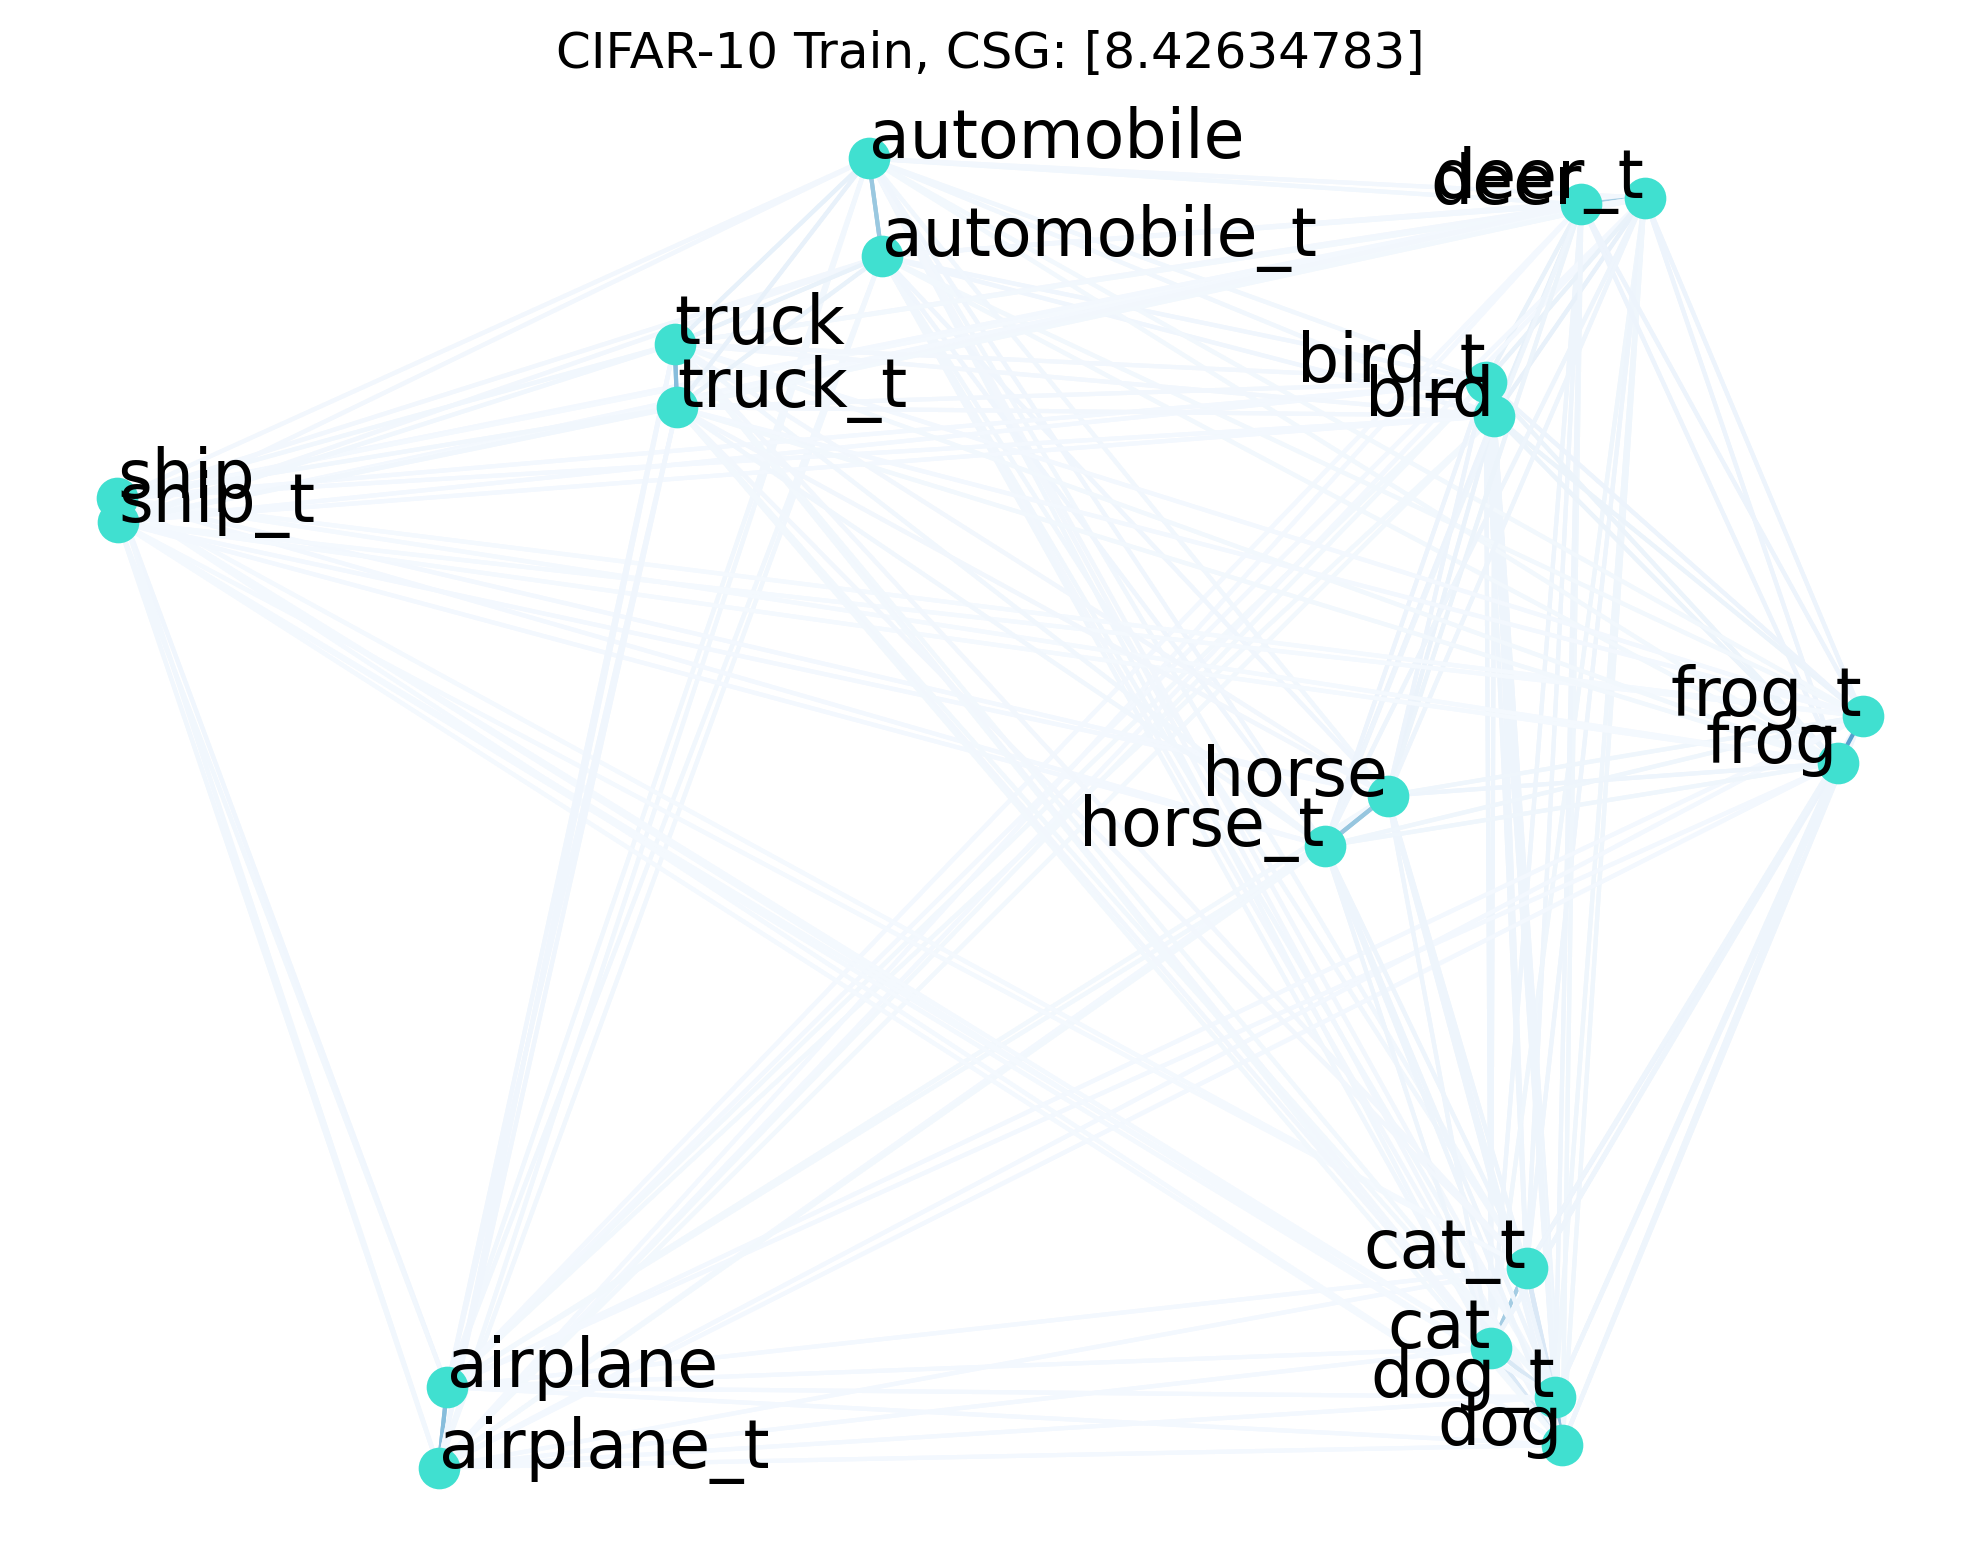

In [8]:
# CIFAR-10 TRAIN SET
X = x_train.reshape( (x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
y = y_train.reshape(y_train.shape[0],)

estimator = CumulativeGradientEstimator(M_sample=1000, k_nearest=10)
estimator.fit(data=X, target=y)
csg = estimator.csg  # The actual complexity values.
estimator.evals, estimator.evecs  # The eigenvalues and vectors.

# Plot the dataset
#make_graph(estimator.difference, title="CIFAR-10 Train, CSG: "+str(csg), classes=["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

#make_graph(estimator.difference, title="CIFAR-10 Train, CSG: "+str(csg), classes=["airplane", "automobile", "bird",  "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

#make_graph(estimator.difference, title="CIFAR-10 Train, CSG: "+str(csg), classes=["airplane", "airplane_t", "automobile", "automobile_t", "bird", "bird_t",  "cat", "cat_t", "deer", "deer_t", "dog", "dog_t", "frog", "frog_t", "horse", "horse_t", "ship", "ship_t", "truck", "truck_t"])

make_graph(estimator.difference, title="CIFAR-10 Train, CSG: "+str(csg), classes=class_names)
           

In [9]:
# Let's compute the W matrix from Branchaud et al. and try to find overlapping classes.
from spectral_metric.estimator import CumulativeGradientEstimator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from spectral_metric.visualize import make_graph

#X, y = features, np.array(ds['intent'])  # Your dataset with shape [N, ?], [N]

#estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5, distance="cosine")
#estimator.fit(data=X, target=y)

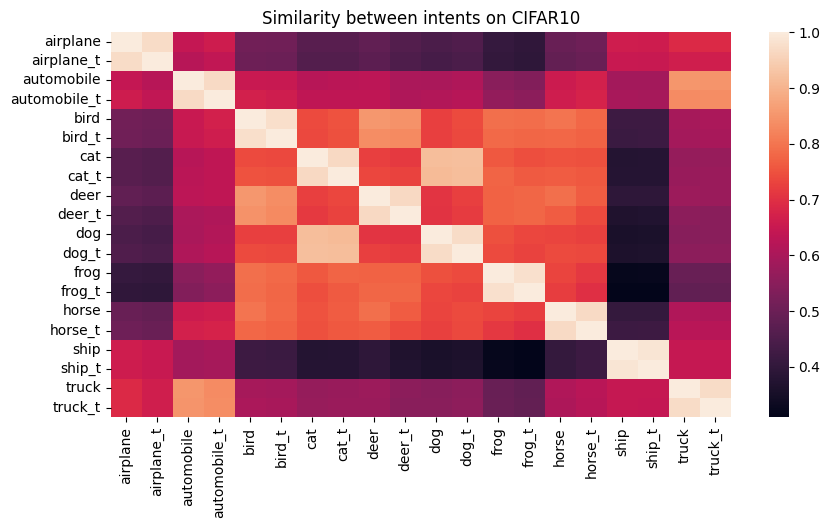

In [10]:
plt.figure(figsize=(10,5))
# Establecer las etiquetas del eje y con los nombres de las clases
sns.heatmap(estimator.W, xticklabels=class_names, yticklabels=class_names)
plt.title("Similarity between intents on CIFAR10")
plt.show()

In [11]:
#class_names=["airplane", "automobile", "bird",  "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#class_names=["airplane", "airplane_t", "automobile", "automobile_t", "bird", "bird_t",  "cat", "cat_t", "deer", "deer_t", "dog", "dog_t", "frog", "frog_t", "horse", "horse_t", "ship", "ship_t", "truck", "truck_t"]

from scipy.stats import entropy
import pandas as pd
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)
print("Class that is the most confused (highest entropy):", class_names[np.argmax(entropy_per_class)])

Class that is the most confused (highest entropy): automobile_t


In [12]:
pairs = list(zip(*np.unravel_index(np.argsort(estimator.W, axis=None), estimator.W.shape)))[::-1]
pairs = [(i,j) for i,j in pairs if i != j]

In [13]:
print("Most similar pairs")
lst = []
for idx, (i,j) in enumerate(pairs[::2][:10]):
    lst.append({"Intent pair" : f"{class_names[i]} <> {class_names[j]}", "Similarity": estimator.W[i,j]})
print(pd.DataFrame(lst))

Most similar pairs
                  Intent pair  Similarity
0              ship_t <> ship    0.988100
1              frog_t <> frog    0.978900
2              bird_t <> bird    0.977216
3            truck <> truck_t    0.972500
4      airplane <> airplane_t    0.972497
5                dog_t <> dog    0.971400
6            horse <> horse_t    0.969759
7  automobile <> automobile_t    0.969112
8              deer <> deer_t    0.966900
9                cat <> cat_t    0.966600


In [ ]:
def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:10]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        # Obtén el índice de la clase
        class_index = int(y_train[int(di)])
        # Imprime el nombre de la clase usando 'class_names'
        print("\t", class_names[class_index])
        image = x_train[int(di)]
        plt.figure(figsize = (1,1))
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        plt.show()


ship_t <> ship
	 ship_t


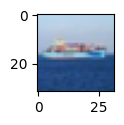

	 ship_t


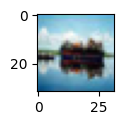

	 ship_t


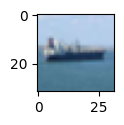

	 ship_t


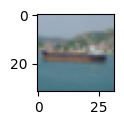

	 ship_t


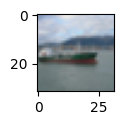

	 ship_t


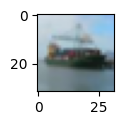

	 ship_t


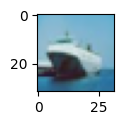

	 ship_t


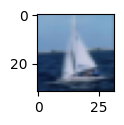

	 ship_t


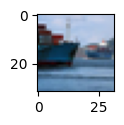

	 ship_t


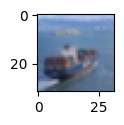

ship <> ship_t
	 ship


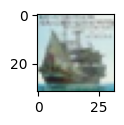

	 ship


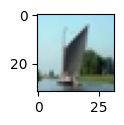

	 ship


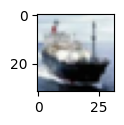

	 ship


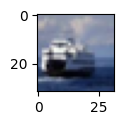

	 ship


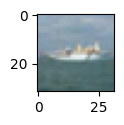

	 ship


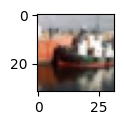

	 ship


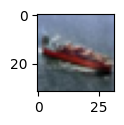

	 ship


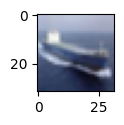

	 ship


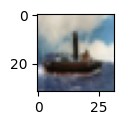

	 ship


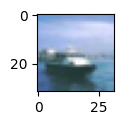

-----------------------------
frog_t <> frog
	 frog_t


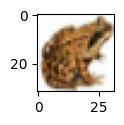

	 frog_t


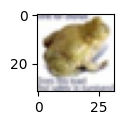

	 frog_t


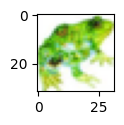

	 frog_t


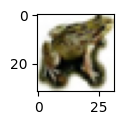

	 frog_t


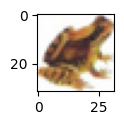

	 frog_t


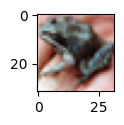

	 frog_t


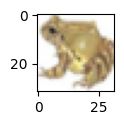

	 frog_t


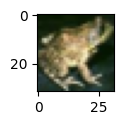

	 frog_t


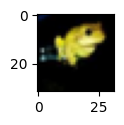

	 frog_t


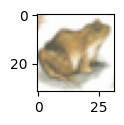

frog <> frog_t
	 frog


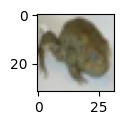

	 frog


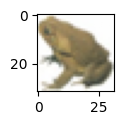

	 frog


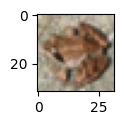

	 frog


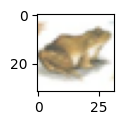

	 frog


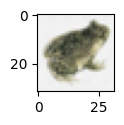

	 frog


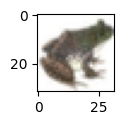

	 frog


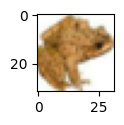

	 frog


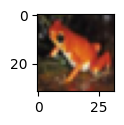

	 frog


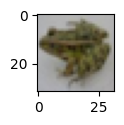

	 frog


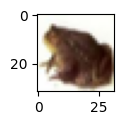

In [16]:
def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:10]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        #print("\t", y_train[int(di)]["text"])
        class_index = int(y_train[int(di)])
        print("\t", class_names[class_index])
        image = x_train[int(di)]
        plt.figure(figsize = (1,1))
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        plt.show()

first_pair = pairs[0]
show_most_confused(first_pair[0], first_pair[1], estimator, class_names)
show_most_confused(first_pair[1], first_pair[0], estimator, class_names)

print("-----------------------------")
second_pair = pairs[2]
show_most_confused(second_pair[0], second_pair[1], estimator, class_names)
show_most_confused(second_pair[1], second_pair[0], estimator, class_names)


Idea: Identificar las imágenes con mayor probabilidad de pertenencia a otra clase, es decir a una clase distinta de la etiqueta (del vector de estimación)... para quitarlas del dataset y entrenar desde cero un modelo con este dataset recortado... para comparar su rendimiento con el del modelo entrenado con el dataset completo

In [17]:
def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        #print("\t", y_train[int(di)]["text"])

        #print("\t", y_train[int(di)])
        print("\t", di)

        #image = x_train[int(di)]
        #plt.figure(figsize = (1,1))
        #plt.imshow(image, cmap=plt.get_cmap('gray'))
        #plt.show()

first_pair = pairs[0]
show_most_confused(first_pair[0], first_pair[1], estimator, class_names)
show_most_confused(first_pair[1], first_pair[0], estimator, class_names)

print("-----------------------------")
second_pair = pairs[2]
show_most_confused(second_pair[0], second_pair[1], estimator, class_names)
show_most_confused(second_pair[1], second_pair[0], estimator, class_names)


A = estimator.similarity_arrays[first_pair[0]].values()

ship_t <> ship
	 53158
	 53034
	 53171
	 53219
	 53367
	 53246
	 53593
	 53845
	 53365
	 53001
	 53736
	 53162
	 53531
	 53413
	 53592
	 53641
	 53454
	 53253
	 53353
	 53180
	 53215
	 53546
	 53628
	 53851
	 53645
	 53087
	 53995
	 53445
	 53164
	 53998
	 53493
	 53057
	 53317
	 53012
	 53881
	 53772
	 53437
	 53688
	 53446
	 53847
	 53685
	 53973
	 53361
	 53536
	 53127
	 53061
	 53686
	 53717
	 53209
	 53070
	 53213
	 53294
	 53594
	 53351
	 53207
	 53696
	 53505
	 53651
	 53820
	 53595
	 53144
	 53259
	 53256
	 53853
	 53981
	 53639
	 53665
	 53866
	 53274
	 53079
	 53242
	 53627
	 53667
	 53766
	 53379
	 53004
	 53548
	 53203
	 53360
	 53069
	 53555
	 53534
	 53344
	 53355
	 53624
	 53214
	 53107
	 53052
	 53043
	 53217
	 53858
	 53915
	 53326
	 53366
	 53391
	 53303
	 53053
	 53175
	 53036
	 53690
	 53589
	 53394
	 53284
	 53296
	 53395
	 53551
	 53590
	 53358
	 53375
	 53348
	 53670
	 53302
	 53524
	 53715
	 53245
	 53569
	 53523
	 53515
	 53333
	 53576
	 53673
	 53015
	 53405
	